# Bonus Track Assignment #2 - How much can you remember?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function that takes in input an image (a matrix) and the proportion of pixels to be distorted (d)

def distort_image(im, d):
    if d < 0 or d > 1:
        print("Out-of-bound proportion: going to default 0.05")
        d = 0.05     # if d is out of the valid range [0,1], set a default value of 0.05.


    imd = np.copy(im)    #copy of the input image
    indx = np.random.permutation(len(imd.ravel()))   #permutation of the indices of the flattened copy image
    todist = indx[:round(len(indx) * d)]     #select a subset of the indices to be distorted (the first d %)
    imd.flat[todist] = -imd.flat[todist]     #apply the distortion to the selected pixels

    return imd   #return the distorted image

In [3]:
# calculate discrepancy
def disc(reconstructed_img, input_img):
#measure ofdiscrepancy (calculate the number of pixel that differ between the reconstructed image and the input pattern)
    d = 0
    input = input_img.T.ravel()
    for i in range(len(reconstructed_img.T.ravel())):
        if reconstructed_img.T.ravel()[i] != input[i]:
            d = d+1
    discrepancy = d / len(reconstructed_img.T.ravel())
    return discrepancy

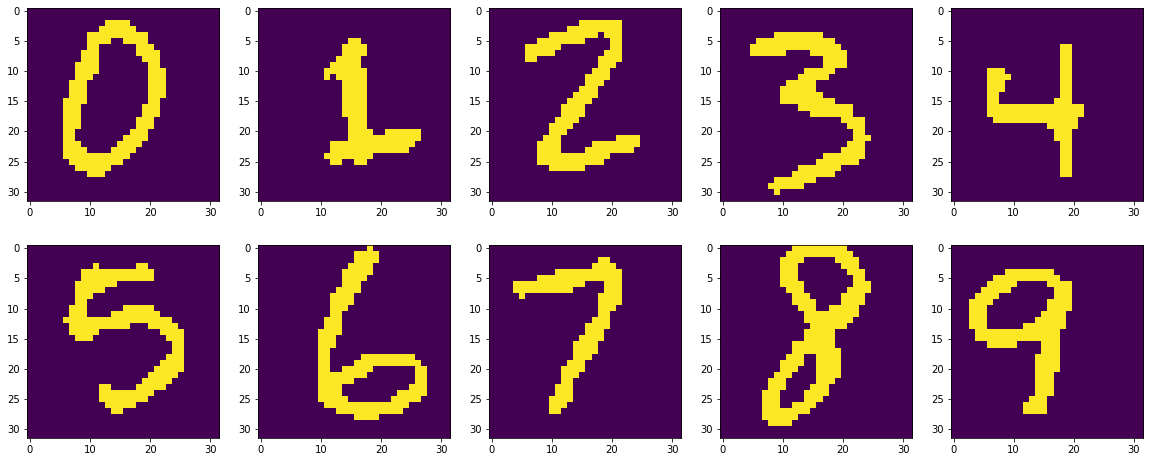

In [4]:
#import the data
p0 = np.loadtxt('./lab2_2_alldigits/p0.csv')
p1 = np.loadtxt('./lab2_2_alldigits/p1.csv')
p2 = np.loadtxt('./lab2_2_alldigits/p2.csv')
p3 = np.loadtxt('./lab2_2_alldigits/p3.csv')
p4 = np.loadtxt('./lab2_2_alldigits/p4.csv')
p5 = np.loadtxt('./lab2_2_alldigits/p5.csv')
p6 = np.loadtxt('./lab2_2_alldigits/p6.csv')
p7 = np.loadtxt('./lab2_2_alldigits/p7.csv')
p8 = np.loadtxt('./lab2_2_alldigits/p8.csv')
p9 = np.loadtxt('./lab2_2_alldigits/p9.csv')

#convert to 32x32 matrix format
im0 = np.transpose(np.reshape(p0, (32, 32)))
im1 = np.transpose(np.reshape(p1, (32, 32)))
im2 = np.transpose(np.reshape(p2, (32, 32)))
im3 = np.transpose(np.reshape(p3, (32, 32)))
im4 = np.transpose(np.reshape(p4, (32, 32)))
im5 = np.transpose(np.reshape(p5, (32, 32)))
im6 = np.transpose(np.reshape(p6, (32, 32)))
im7 = np.transpose(np.reshape(p7, (32, 32)))
im8 = np.transpose(np.reshape(p8, (32, 32)))
im9 = np.transpose(np.reshape(p9, (32, 32)))


#show images
plt.figure(figsize=(20,8))
plt.subplot(2,5,1)
plt.imshow(im0)
plt.subplot(2,5,2)
plt.imshow(im1)
plt.subplot(2,5,3)
plt.imshow(im2)
plt.subplot(2,5,4)
plt.imshow(im3)
plt.subplot(2,5,5)
plt.imshow(im4)
plt.subplot(2,5,6)
plt.imshow(im5)
plt.subplot(2,5,7)
plt.imshow(im6)
plt.subplot(2,5,8)
plt.imshow(im7)
plt.subplot(2,5,9)
plt.imshow(im8)
plt.subplot(2,5,10)
plt.imshow(im9)
plt.show()


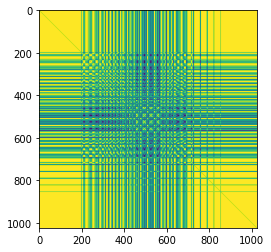

In [5]:
#learn first three digits

size = len(np.outer(p2,p2))

#weight matrix:
w = (1/len(p0))*((np.outer(p0,p0)+np.outer(p1,p1)+np.outer(p2,p2))-3*np.identity(size))

plt.imshow(w)

In [6]:
#function that takes in input a probe image, and the correct memory image it should converge to,
# the number until which learning has been done, and the number to calculate the overlap with
def retrieval(probe, img_in, c, num):
    #initialization
    x = np.copy(probe.T.ravel()) #linearize probe image into a vector 

    bias = np.random.normal(0.52, 0.01, size=len(x)) #gaussian bias applied to neurons
    #iteration until convergence
    epochs = 100 #max number of epochs

    #arrays to store values of overlaps
    m0_hist = []
    m1_hist = []
    m2_hist = []
    m3_hist = []
    m4_hist = []
    m5_hist = []
    m6_hist = []
    m7_hist = []
    m8_hist = [] 
    m9_hist = [] 


    for N in range (epochs):

        xold = np.copy(x) #store values of neurons in order to compare with next epoch

        i = np.random.permutation(len(x)) #to choose neurons in random order
        for j in i:
            x[j] = np.sign(np.dot(w[j,:], x)+bias[j]) #apply the update equation

            #commpute overlap functions 
            m0 = 1/len(p0)*np.dot(p0,x)
            m1 = 1/len(p1)*np.dot(p1,x)
            m2 = 1/len(p2)*np.dot(p2,x)
            m3 = 1/len(p3)*np.dot(p3,x)
            m4 = 1/len(p4)*np.dot(p4,x)
            m5 = 1/len(p5)*np.dot(p5,x)
            m6 = 1/len(p6)*np.dot(p6,x)
            m7 = 1/len(p7)*np.dot(p7,x)
            m8 = 1/len(p8)*np.dot(p8,x)
            m9 = 1/len(p9)*np.dot(p9,x)

            m0_hist = np.append(m0_hist, m0)
            m1_hist = np.append(m1_hist, m1)
            m2_hist = np.append(m2_hist, m2)
            m3_hist = np.append(m3_hist, m3)
            m4_hist = np.append(m4_hist, m4)
            m5_hist = np.append(m5_hist, m5)
            m6_hist = np.append(m6_hist, m6)
            m7_hist = np.append(m7_hist, m7)
            m8_hist = np.append(m8_hist, m8)
            m9_hist = np.append(m9_hist, m9)


        #if in one epoch no neuron changes its value, stop iterting (fixed point reached)
        if np.array_equal(x, xold):
            print('stop iterating') 
            break

    #make plots
    plt.title(f'Overlaps with {num} (learned until {c})')
    plt.plot(m0_hist, label = '0')
    plt.plot(m1_hist, label = '1')
    plt.plot(m2_hist, label = '2')
    if c > 2:
        plt.plot(m3_hist, label = '3')
    if c > 3:
        plt.plot(m4_hist, label = '4')
    if c > 4:
        plt.plot(m5_hist, label = '5')
    if c > 5:
        plt.plot(m6_hist, label = '6')
    if c > 6:
        plt.plot(m7_hist, label = '7')
    if c > 7:
        plt.plot(m8_hist, label = '8')
    if c > 8:
        plt.plot(m9_hist, label = '9')


    plt.xlabel('update #')
    plt.ylabel('Overlap function')

    plt.legend()
    plt.savefig(f'plots_bt2/learned_until_{c}_{num}.pdf')
    plt.show()


    #reconstructed image
    imx = np.transpose(np.reshape(x, (32, 32)))

    #measure ofdiscrepancy (calculate the number of pixel that differ between the reconstructed image and the input pattern)
    d = disc(imx, img_in)
    print(f'discrepancy: {d}')


    plt.subplot(1,3,1)
    plt.title(f'Memorized Input')
    plt.imshow(img_in)

    plt.subplot(1,3,2)
    plt.title(f'Perturbed Input')
    plt.imshow(probe)

    plt.subplot(1,3,3)
    plt.title(f'Discrepancy = {d*100} %')
    plt.imshow(imx)
    plt.tight_layout() 
    plt.show()

    return d


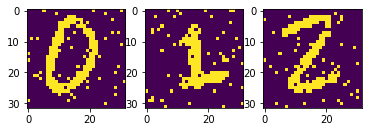

In [7]:
# distort first three images
im0d = distort_image(im0, 0.05)
im1d = distort_image(im1, 0.05)
im2d = distort_image(im2, 0.05)


plt.figure()
plt.subplot(1,3,1)
plt.imshow(im0d)
plt.subplot(1,3,2)
plt.imshow(im1d)
plt.subplot(1,3,3)
plt.imshow(im2d)
plt.show()

stop iterating


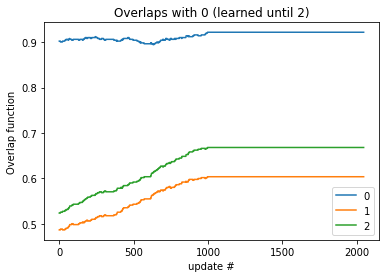

discrepancy: 0.0390625


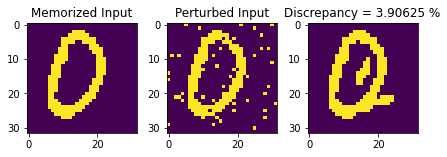

stop iterating


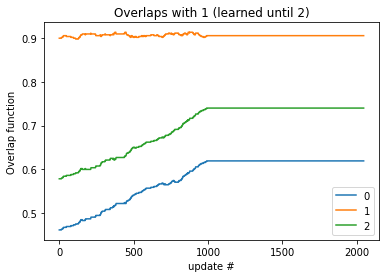

discrepancy: 0.046875


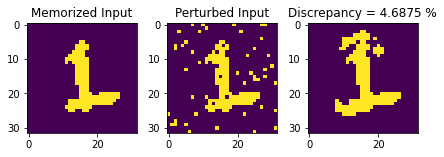

stop iterating


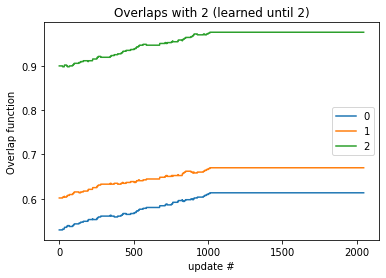

discrepancy: 0.01171875


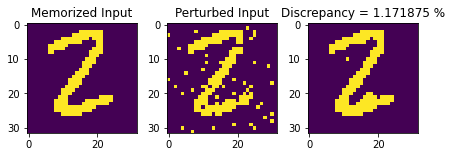

average discrepancy: [0.03255208]


In [8]:
avg_discr = []

d0 = retrieval(im0d, im0, 2,0)
d1 = retrieval(im1d, im1, 2,1)
d2 = retrieval(im2d, im2, 2,2)

avg_discr = np.append(avg_discr,np.mean([d0,d1,d2]))
print(f'average discrepancy: {avg_discr}')

In [9]:
# distort remaining images

im3d = distort_image(im3, 0.05)
im4d = distort_image(im4, 0.05)
im5d = distort_image(im5, 0.05)
im6d = distort_image(im6, 0.05)
im7d = distort_image(im7, 0.05)
im8d = distort_image(im8, 0.05)
im9d = distort_image(im9, 0.05)

Incrementally learn new patterns and plot the overlaps every time a new pattern is added.

stop iterating


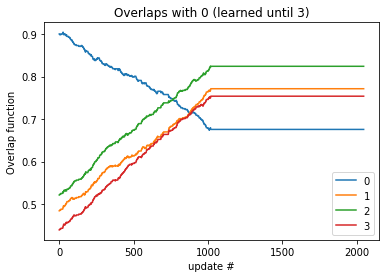

discrepancy: 0.162109375


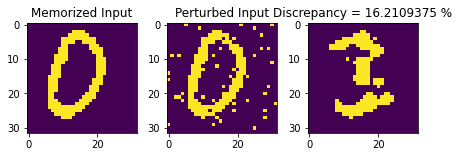

stop iterating


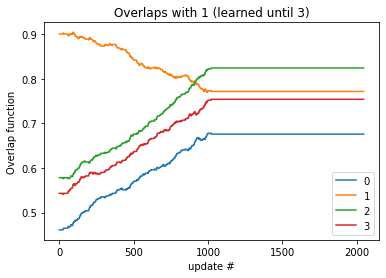

discrepancy: 0.1142578125


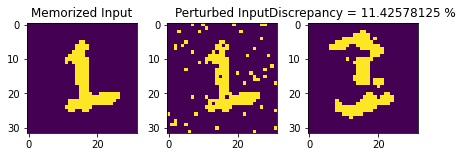

stop iterating


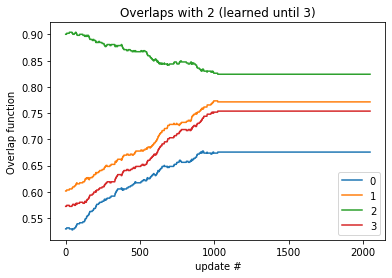

discrepancy: 0.087890625


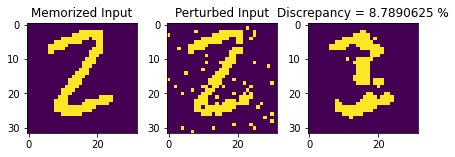

stop iterating


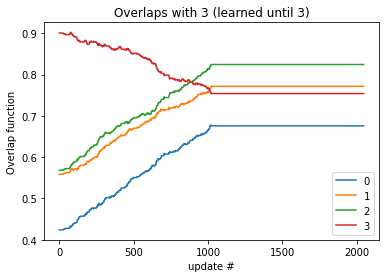

discrepancy: 0.123046875


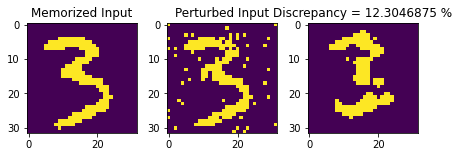

stop iterating


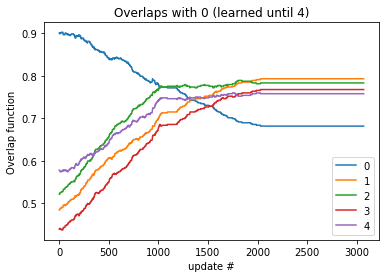

discrepancy: 0.1591796875


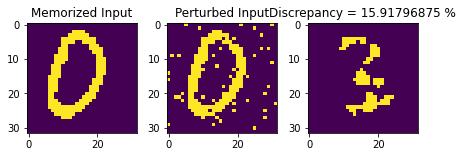

stop iterating


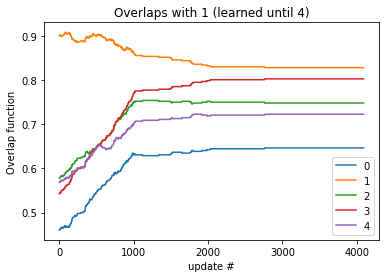

discrepancy: 0.0859375


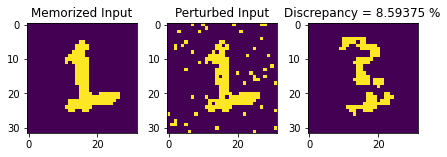

stop iterating


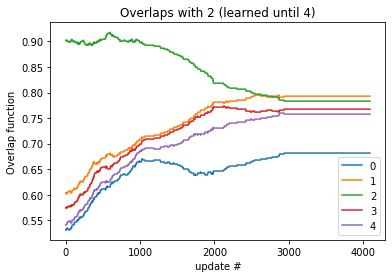

discrepancy: 0.1083984375


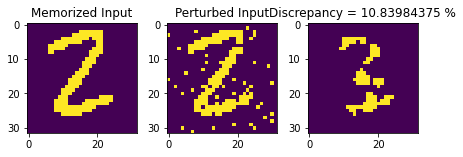

stop iterating


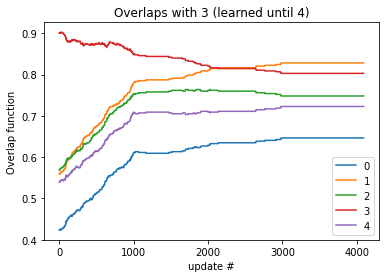

discrepancy: 0.0986328125


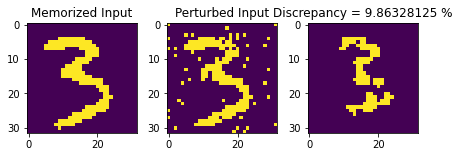

stop iterating


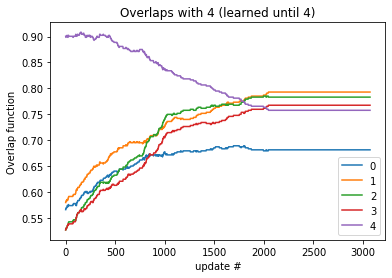

discrepancy: 0.12109375


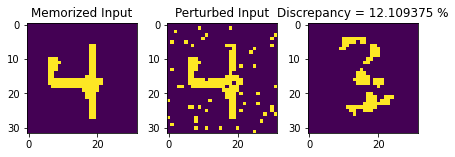

stop iterating


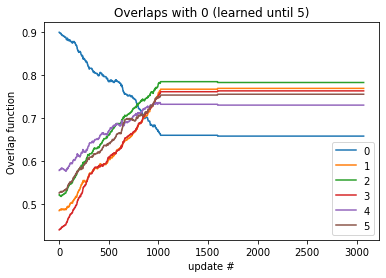

discrepancy: 0.1708984375


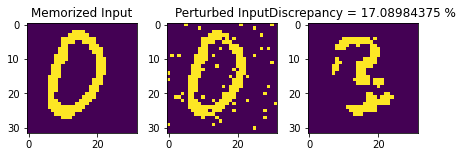

stop iterating


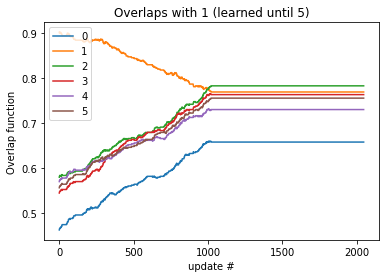

discrepancy: 0.115234375


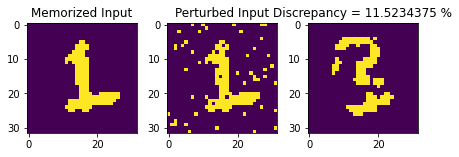

stop iterating


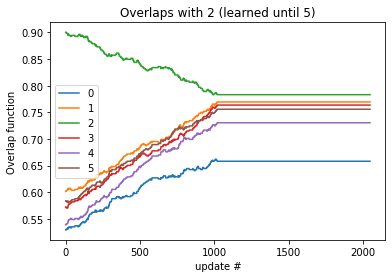

discrepancy: 0.1083984375


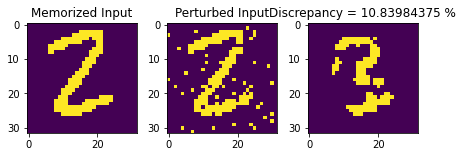

stop iterating


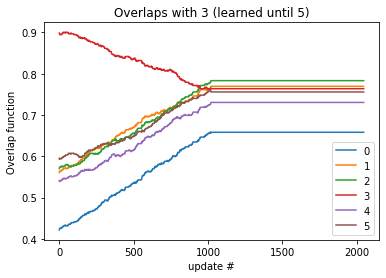

discrepancy: 0.1181640625


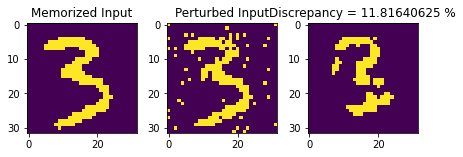

stop iterating


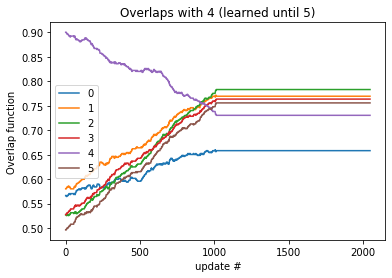

discrepancy: 0.134765625


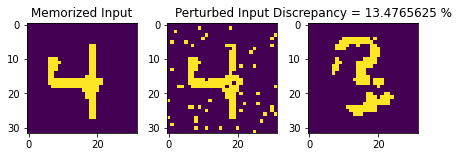

stop iterating


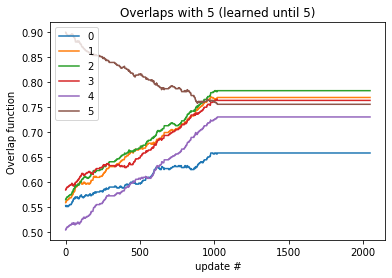

discrepancy: 0.1220703125


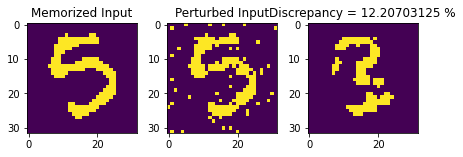

stop iterating


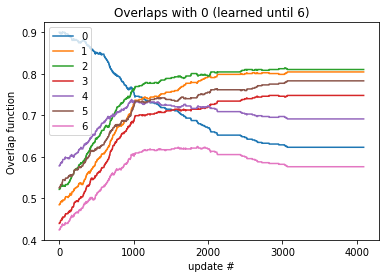

discrepancy: 0.1884765625


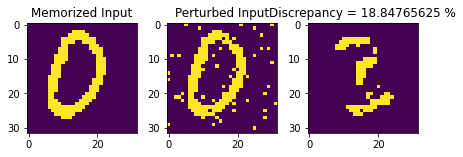

stop iterating


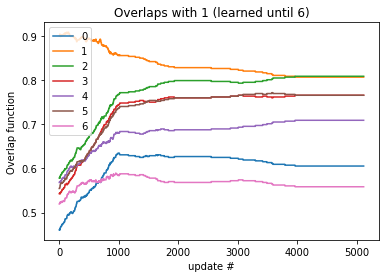

discrepancy: 0.0966796875


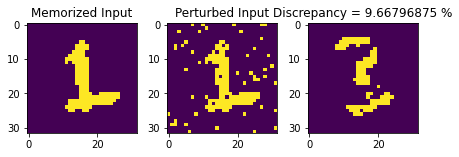

stop iterating


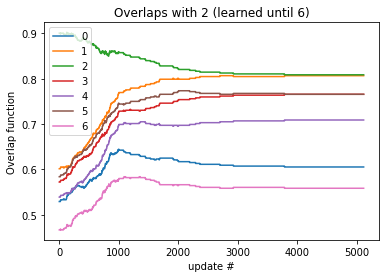

discrepancy: 0.095703125


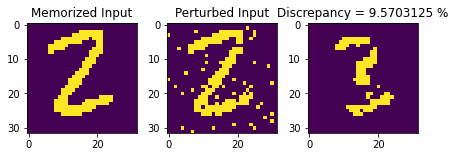

stop iterating


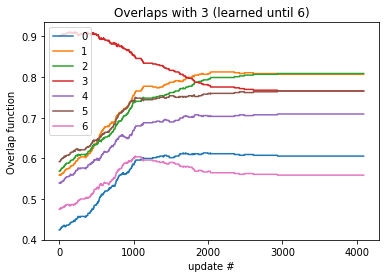

discrepancy: 0.1171875


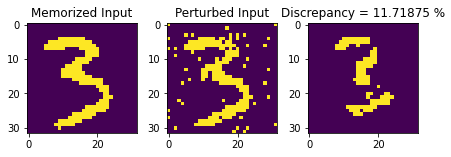

stop iterating


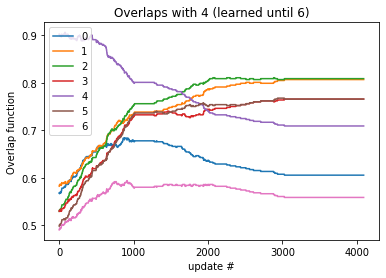

discrepancy: 0.1455078125


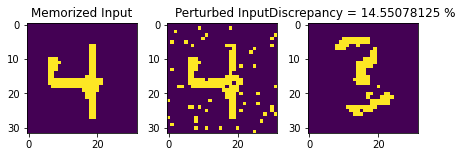

stop iterating


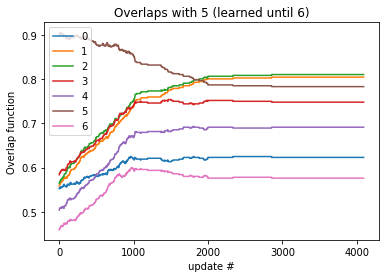

discrepancy: 0.1083984375


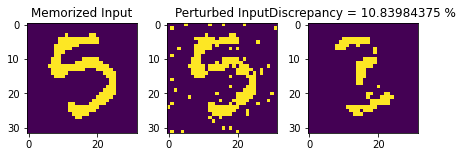

stop iterating


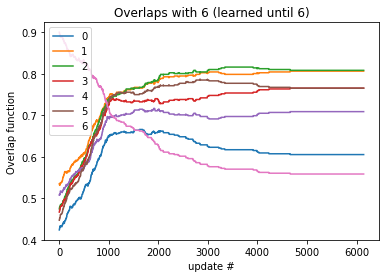

discrepancy: 0.220703125


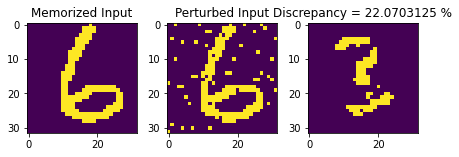

stop iterating


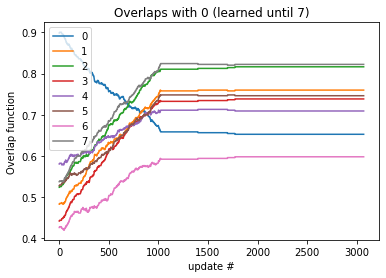

discrepancy: 0.173828125


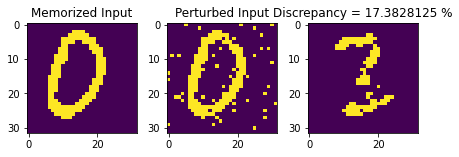

stop iterating


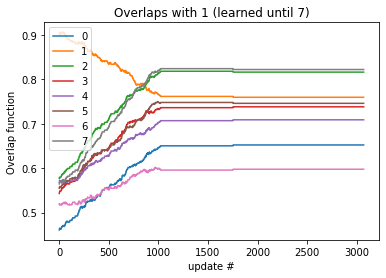

discrepancy: 0.1201171875


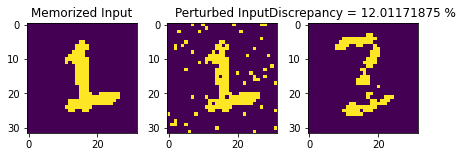

stop iterating


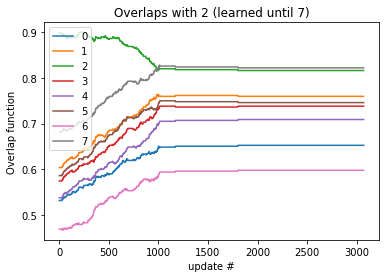

discrepancy: 0.091796875


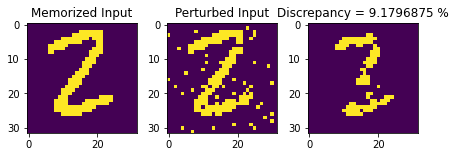

stop iterating


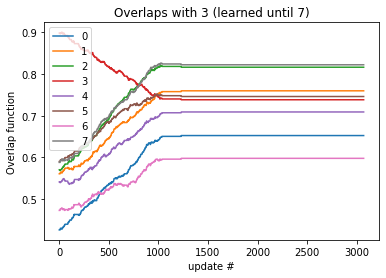

discrepancy: 0.130859375


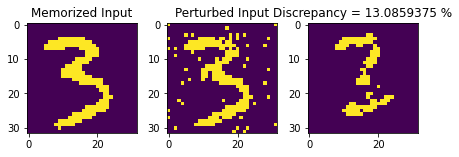

stop iterating


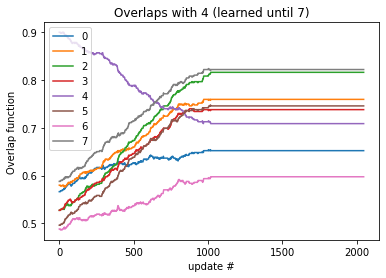

discrepancy: 0.1455078125


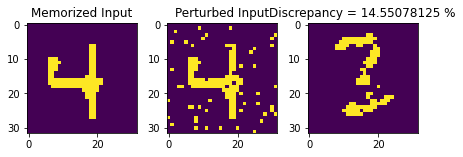

stop iterating


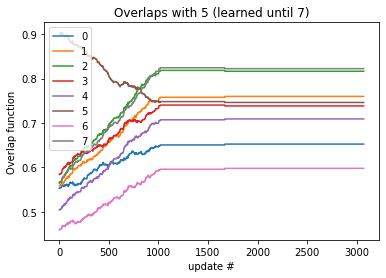

discrepancy: 0.126953125


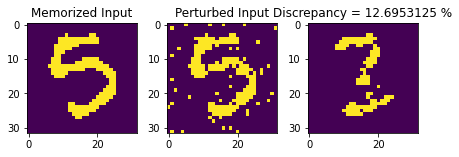

stop iterating


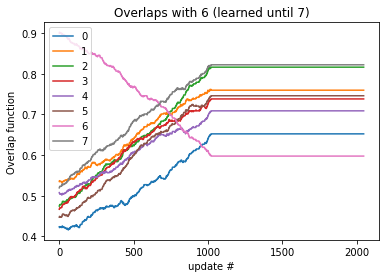

discrepancy: 0.201171875


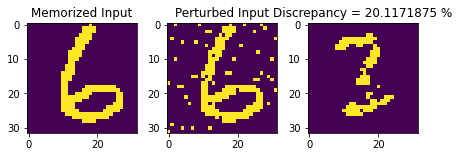

stop iterating


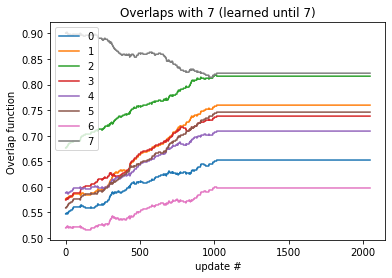

discrepancy: 0.0888671875


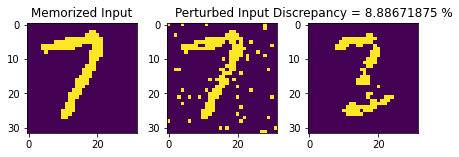

stop iterating


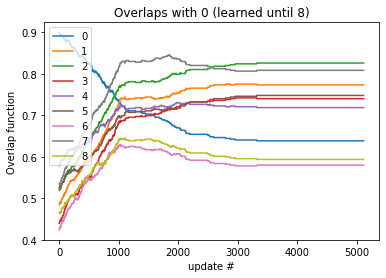

discrepancy: 0.1806640625


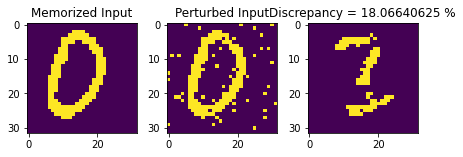

stop iterating


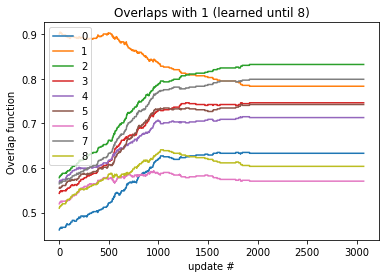

discrepancy: 0.1083984375


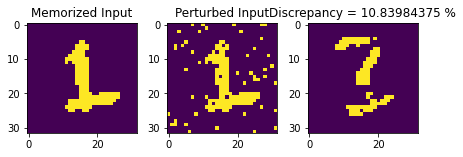

stop iterating


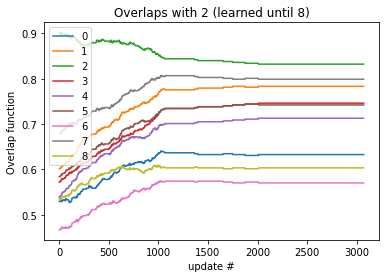

discrepancy: 0.083984375


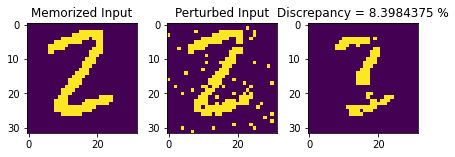

stop iterating


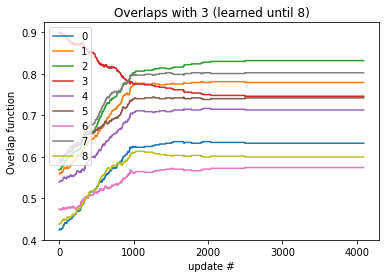

discrepancy: 0.126953125


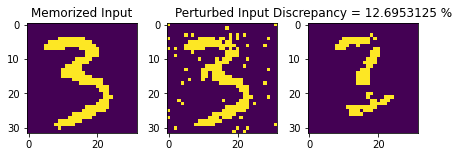

stop iterating


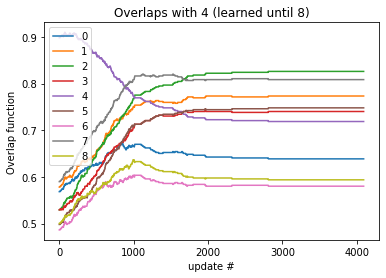

discrepancy: 0.140625


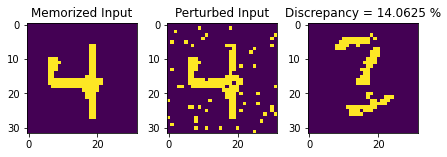

stop iterating


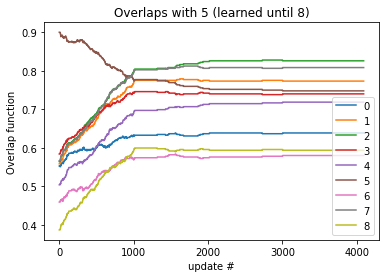

discrepancy: 0.1259765625


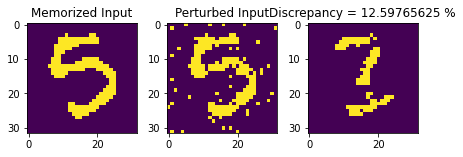

stop iterating


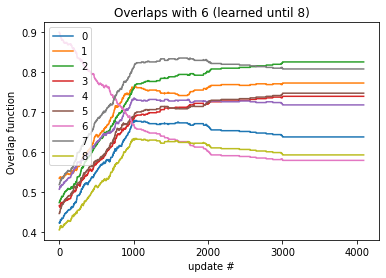

discrepancy: 0.2099609375


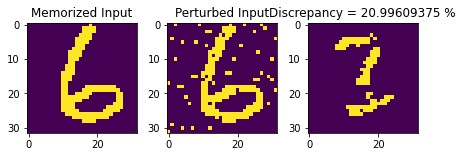

stop iterating


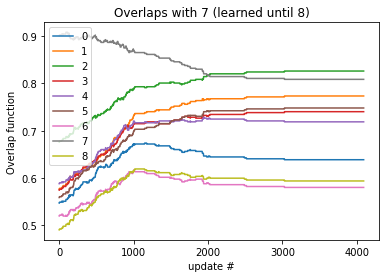

discrepancy: 0.095703125


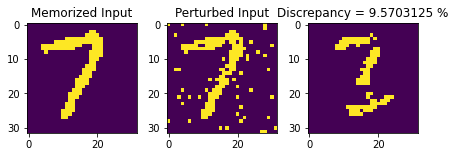

stop iterating


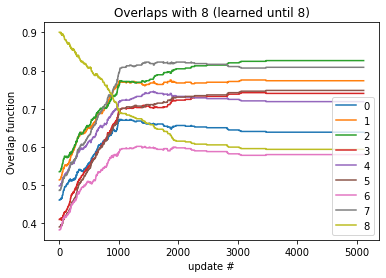

discrepancy: 0.203125


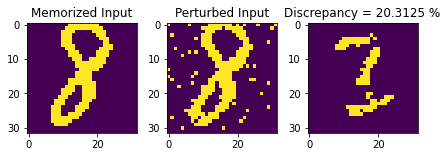

stop iterating


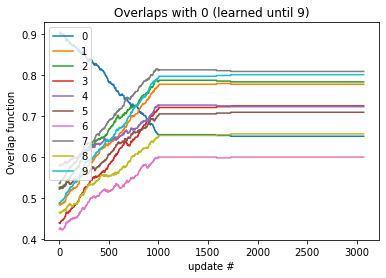

discrepancy: 0.1748046875


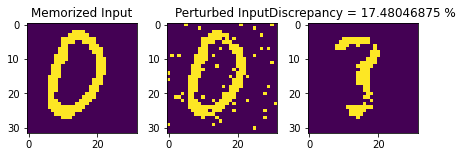

stop iterating


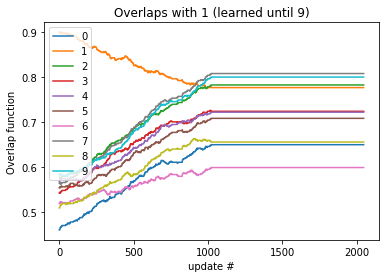

discrepancy: 0.111328125


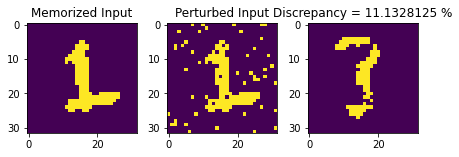

stop iterating


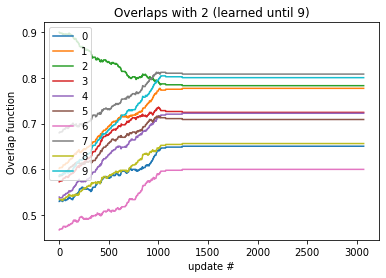

discrepancy: 0.1083984375


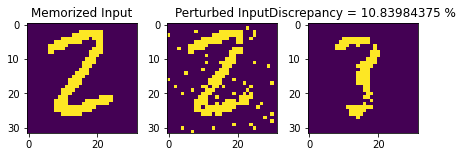

stop iterating


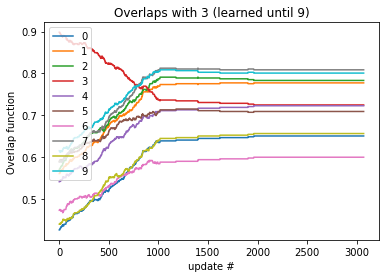

discrepancy: 0.1376953125


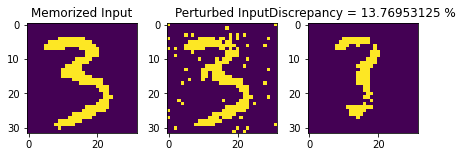

stop iterating


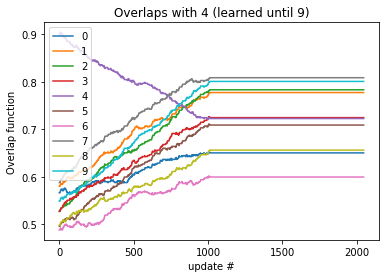

discrepancy: 0.138671875


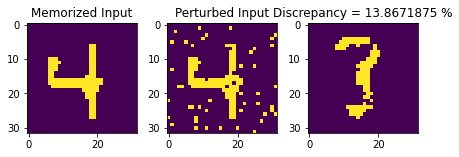

stop iterating


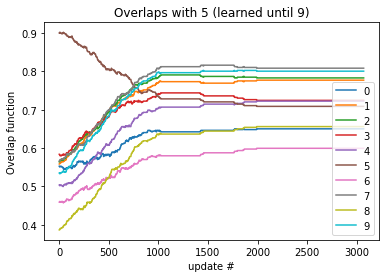

discrepancy: 0.1455078125


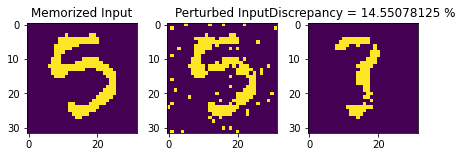

stop iterating


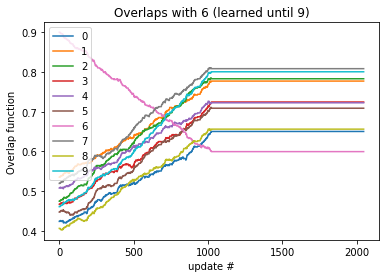

discrepancy: 0.2001953125


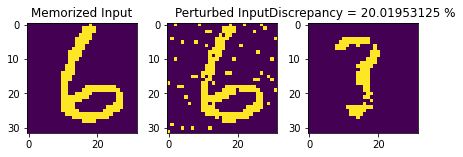

stop iterating


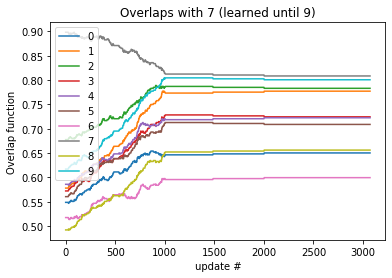

discrepancy: 0.095703125


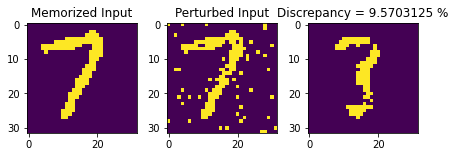

stop iterating


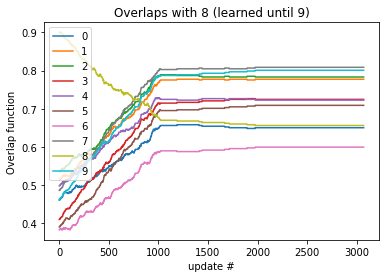

discrepancy: 0.171875


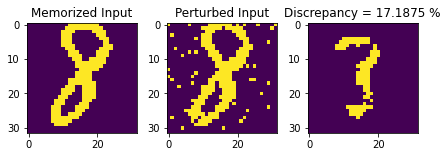

stop iterating


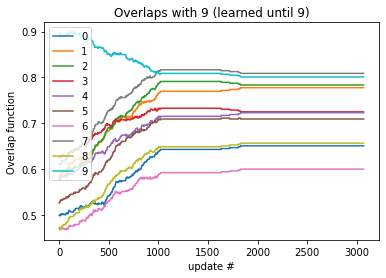

discrepancy: 0.099609375


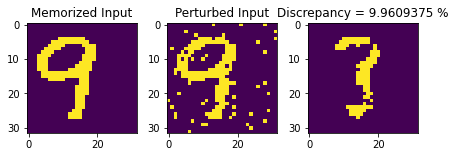

[0.03255208 0.12182617 0.11464844 0.12825521 0.13895089 0.1348877
 0.14171007 0.13837891]


In [10]:
# Learn digit "3"
w = w + (1/len(p0))*((np.outer(p3,p3))-np.identity(size))


d0 = retrieval(im0d, im0, 3,0)
d1 = retrieval(im1d, im1, 3,1)
d2 = retrieval(im2d, im2, 3,2)
d3 = retrieval(im3d, im3, 3,3)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3]))


# Learn digit "4"
w = w + (1/len(p0))*((np.outer(p4,p4))-np.identity(size))


d0 = retrieval(im0d, im0, 4,0)
d1 = retrieval(im1d, im1, 4,1)
d2 = retrieval(im2d, im2, 4,2)
d3 = retrieval(im3d, im3, 4,3)
d4 = retrieval(im4d, im4, 4,4)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4]))



# Learn digit "5"
w = w + (1/len(p0))*((np.outer(p5,p5))-np.identity(size))


d0 = retrieval(im0d, im0, 5,0)
d1 = retrieval(im1d, im1, 5,1)
d2 = retrieval(im2d, im2, 5,2)
d3 = retrieval(im3d, im3, 5,3)
d4 = retrieval(im4d, im4, 5,4)
d5 = retrieval(im5d, im5, 5,5)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5]))

# Learn digit "6"
w = w + (1/len(p0))*((np.outer(p6,p6))-np.identity(size))


d0 = retrieval(im0d, im0, 6,0)
d1 = retrieval(im1d, im1, 6,1)
d2 = retrieval(im2d, im2, 6,2)
d3 = retrieval(im3d, im3, 6,3)
d4 = retrieval(im4d, im4, 6,4)
d5 = retrieval(im5d, im5, 6,5)
d6 = retrieval(im6d, im6, 6,6)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6]))

# Learn digit "7"
w = w + (1/len(p0))*((np.outer(p7,p7))-np.identity(size))


d0 = retrieval(im0d, im0, 7,0)
d1 = retrieval(im1d, im1, 7,1)
d2 = retrieval(im2d, im2, 7,2)
d3 = retrieval(im3d, im3, 7,3)
d4 = retrieval(im4d, im4, 7,4)
d5 = retrieval(im5d, im5, 7,5)
d6 = retrieval(im6d, im6, 7,6)
d7 = retrieval(im7d, im7, 7,7)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6,d7]))


# Learn digit "8"
w = w + (1/len(p0))*((np.outer(p8,p8))-np.identity(size))


d0 = retrieval(im0d, im0, 8,0)
d1 = retrieval(im1d, im1, 8,1)
d2 = retrieval(im2d, im2, 8,2)
d3 = retrieval(im3d, im3, 8,3)
d4 = retrieval(im4d, im4, 8,4)
d5 = retrieval(im5d, im5, 8,5)
d6 = retrieval(im6d, im6, 8,6)
d7 = retrieval(im7d, im7, 8,7)
d8 = retrieval(im8d, im8, 8,8)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6,d7,d8]))


# Learn digit "9"
w = w + (1/len(p0))*((np.outer(p9,p9))-np.identity(size))


d0 = retrieval(im0d, im0, 9,0)
d1 = retrieval(im1d, im1, 9,1)
d2 = retrieval(im2d, im2, 9,2)
d3 = retrieval(im3d, im3, 9,3)
d4 = retrieval(im4d, im4, 9,4)
d5 = retrieval(im5d, im5, 9,5)
d6 = retrieval(im6d, im6, 9,6)
d7 = retrieval(im7d, im7, 9,7)
d8 = retrieval(im8d, im8, 9,8)
d9 = retrieval(im9d, im9, 9,9)


avg_discr = np.append(avg_discr,np.mean([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]))

print(avg_discr)



When we try to memorize more than 3 digits, all the inputs tend to collapse to a memorized input wich is a spurious mix of the stored ones.

[ 3  4  5  6  7  8  9 10]


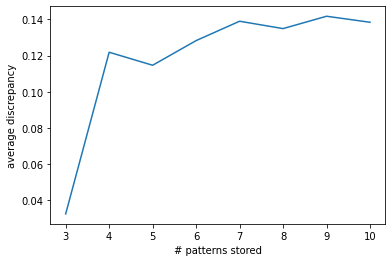

In [11]:
plt.figure()
x = np.arange(3,3+len(avg_discr))
print(x)
plt.plot(x, avg_discr)
plt.xlabel('# patterns stored')
plt.ylabel('average discrepancy')
plt.savefig('plots_bt2/discrepancy.pdf')


After the 3rd stored pattern, there is an evident drop in reconstruction performance, of the order of 10%.
